In [ ]:
#%config Completer.use_jedi = False

# **Chapter 4**
## *Persisting Time Series Data to Files*, 

This chapter covers different options and use cases to store time series data for later retrieval. The techniques will cover various methods and file types, whether on-premises or in the cloud. In addition, this chapter covers serialization, compression, overwriting, or appending to files. 

We will cover the following recipes on how to ingest data into a pandas DataFrame:
* Time series data serialization with pickle
* Writing to CSV and other delimited files
* Writing data to an Excel file
* Storing data to a private S3 bucket

# Recipe 1: Serializing time series data with pickle
* This recipe explains the concept of data serialization 
* Demonstrate how pickling works 

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
pd.__version__

'2.2.2'

In [12]:
file = \
Path('../../datasets/Ch4/time_series_covid19_confirmed_global.csv')
df = pd.read_csv(file)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [36]:
# filter data where Country is United States
df_usa = df[df['Country/Region'] == 'US']
# filter columns from June to end of September
df_usa_summer = df_usa.loc[:, '6/1/21':'9/30/21']
# pivot the data 
df_usa_summer

,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,...,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21
260,33407540,33424131,33442100,33459613,33474770,33480666,33494852,33507651,33525852,33540369,...,42487611,42619242,42748318,42922887,42984802,43040459,43194360,43307569,43429449,43539596


In [51]:
# unpivot using pd.melt()
df_usa_summer_unpivoted = \
    pd.melt(df_usa_summer,
            value_vars=df_usa_summer.columns,
            value_name='cases',
            var_name='date').set_index('date')


df_usa_summer_unpivoted.index = \
    pd.to_datetime(df_usa_summer_unpivoted.index, format="%m/%d/%y")

df_usa_summer_unpivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2021-06-01 to 2021-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [40]:
# df_usa_summer_unpivoted.index = \
# pd.to_datetime(df_usa_summer_unpivoted.index, format="%m/%d/%y")

# df_usa_summer_unpivoted.info()

In [53]:
print(df_usa_summer_unpivoted.head())

               cases
date                
2021-06-01  33407540
2021-06-02  33424131
2021-06-03  33442100
2021-06-04  33459613
2021-06-05  33474770


In [57]:
output =\
Path('../../datasets/Ch4/covid_usa_summer_2021.pkl')

df_usa_summer_unpivoted.to_pickle(output)

In [55]:
unpickled_df = pd.read_pickle(output)
unpickled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2021-06-01 to 2021-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


## Writing a Pickle file using the Pickle library

In [58]:
import pickle

In [76]:
file_path = \
Path('../../datasets/Ch4/covid_usa_summer_2021_v2.pkl')

with open(file_path, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted, file)

In [77]:
with open(file_path, "rb") as file:
    df = pickle.load(file)
type(df)

pandas.core.frame.DataFrame

In [ ]:
with open(output, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted, file)

In [ ]:
with open(output, "rb") as file:
    df = pickle.load(file)

In [82]:
zip_output =\
Path('../../datasets/Ch4/covid_usa_summer_2021.zip')

# write the Dataframe
df_usa_summer_unpivoted.to_pickle(zip_output)

In [83]:
# Read the DataFrame
pd.read_pickle(zip_output)

,cases
date,
2021-06-01,33407540
2021-06-02,33424131
2021-06-03,33442100
2021-06-04,33459613
2021-06-05,33474770
...,...
2021-09-26,43040459
2021-09-27,43194360
2021-09-28,43307569


#### Check seriealization protocols

In [84]:
pickle.HIGHEST_PROTOCOL

5

In [85]:
with open(output, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted,
                file,
                pickle.HIGHEST_PROTOCOL)

# this is equivalent to the following
with open(output, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted,
                file,
                5)

## There is more

In [88]:
def covid_by_country(file, days, country):
    ts = pd.read_csv(file)
    ts = ts[ts['Country/Region'] == country]
    final = ts.iloc[:, -days:].sum()
    final.index = pd.to_datetime(final.index, 
                                format="%m/%d/%y")
    return final

In [104]:
file = \
Path('../../datasets/Ch4/time_series_covid19_confirmed_global.csv')

us_past_120_days = covid_by_country(file, 200, 'US')
us_past_120_days

2022-08-22     93660652
2022-08-23     93759938
2022-08-24     93911627
2022-08-25     94051288
2022-08-26     94172008
                ...    
2023-03-05    103646975
2023-03-06    103655539
2023-03-07    103690910
2023-03-08    103755771
2023-03-09    103802702
Length: 200, dtype: int64

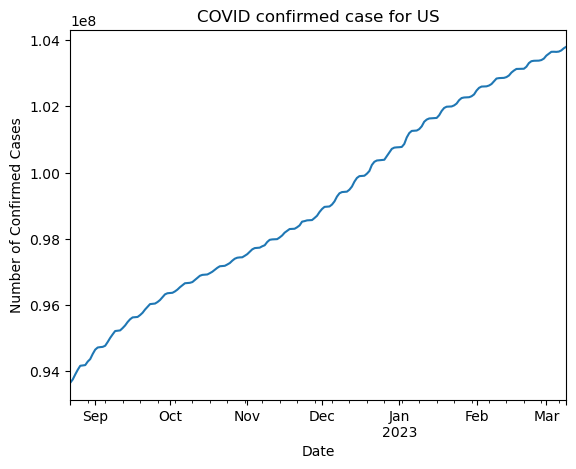

In [113]:
plot_example = \
us_past_120_days.plot(title=f'COVID confirmed case for US',
                xlabel='Date',
                ylabel='Number of Confirmed Cases');

In [ ]:
fig = plot_example.get_figure()

In [122]:
from datetime import datetime

metadata = {
    'date': datetime.now(),
    'data': '''
        COVID-19 Data Repository by the 
        Center for Systems Science and Engineering (CSSE) 
        at Johns Hopkins University'
        ''',
    'author': 'Tarek Atwan',
    'version': 1.0,
    'function': covid_by_country,
    'example_df' : us_past_120_days,
    'example_plot': plot_example
}

file_path = Path('../../datasets/Ch4/covid_data.pkl')

with open(file_path, 'wb') as file:
    pickle.dump(metadata, file)

In [123]:
with open(file_path, 'rb') as file:
    content = pickle.load(file)
content.keys()

dict_keys(['date', 'data', 'author', 'version', 'function', 'example_df', 'example_plot'])

In [119]:
file_path =\
Path('../../datasets/Ch4/time_series_covid19_confirmed_global.csv')

loaded_func = content['function']
loaded_func(file_path, 120, 'China').tail()

2023-03-05    4903524
2023-03-06    4903524
2023-03-07    4903524
2023-03-08    4903524
2023-03-09    4903524
dtype: int64

In [124]:
loaded_df = content['example_df']
loaded_df.tail()

2023-03-05    103646975
2023-03-06    103655539
2023-03-07    103690910
2023-03-08    103755771
2023-03-09    103802702
dtype: int64

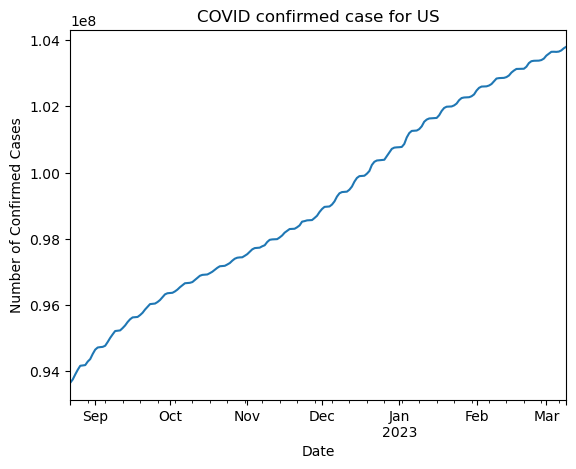

In [126]:
loaded_plot = content['example_plot']
loaded_plot.get_figure()

In [95]:
pickle.HIGHEST_PROTOCOL

5

# Recipe 2: Writing as CSV and other delimited files

In [130]:
pd.read_csv(filepath)

,Date,DOW,Rank,Daily,Percent Change,Diff (k),Forecast,Percent Diff,Theaters,To Date,Row ID
0,26-Apr-21,Friday,1,"$125,789.89",NaN,-,"$235,036.46",-46.48%,1000,"$125,789.89",1
1,27-Apr-21,Saturday,1,"$99,374.01",79.00%,-26416,"$197,622.55",-49.72%,1000,"$225,163.90",2
2,28-Apr-21,Sunday,1,"$82,203.16",82.72%,-17171,"$116,991.26",-29.74%,1000,"$307,367.06",3
3,29-Apr-21,Monday,1,"$33,530.26",40.79%,-48673,"$66,652.65",-49.69%,1000,"$340,897.32",4
4,30-Apr-21,Tuesday,1,"$30,105.24",89.79%,-3425,"$34,828.19",-13.56%,1000,"$371,002.56",5
...,...,...,...,...,...,...,...,...,...,...,...
123,27-Aug-21,Tuesday,42,$0.00,29.03%,0,$0.01,-45.07%,100,"$752,143.86",124
124,28-Aug-21,Wednesday,43,$0.00,49.60%,0,$0.00,-32.94%,100,"$752,143.87",125
125,29-Aug-21,Thursday,42,$0.00,29.03%,0,$0.00,-38.06%,100,"$752,143.87",126
126,30-Aug-21,Friday,36,$0.00,49.60%,0,$0.00,-24.58%,100,"$752,143.87",127


In [131]:
import pandas as pd
from pathlib import Path
filepath = Path('../../datasets/Ch4/movieboxoffice.csv')

movies = pd.read_csv(filepath,
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 usecols=['Date',
                          'Daily'],
                date_format="%d-%b-%y")
movies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Daily   128 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [132]:
movies.head()

,Daily
Date,
2021-04-26,"$125,789.89"
2021-04-27,"$99,374.01"
2021-04-28,"$82,203.16"
2021-04-29,"$33,530.26"
2021-04-30,"$30,105.24"


In [133]:
output = Path('../../datasets/Ch4/df_movies.csv')
movies.to_csv(output)

In [134]:
output = Path('../../datasets/Ch4/piped_df_movies.csv')
movies.to_csv(output, sep='|')

In [135]:
movies_df = pd.read_csv(output, sep='|')

In [136]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    128 non-null    object
 1   Daily   128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB



### Special cases when using `.to_csv()`

In [142]:
import pandas as pd
person = pd.DataFrame({
     'name': ['Bond, James', 'Smith, James', 'Bacon, Kevin'],
     'location': ['Los Angeles, CA', 'Phoenix, AZ', 'New York, NY'],
     'net_worth': [10000, 9000, 8000]
    })

print(person)

           name         location  net_worth
0   Bond, James  Los Angeles, CA      10000
1  Smith, James      Phoenix, AZ       9000
2  Bacon, Kevin     New York, NY       8000


In [138]:
person.to_csv('person_a.csv', index=False)

In [140]:
pd.read_csv('person_a.csv')

,name,location,net_worth
0,"Bond, James","Los Angeles, CA",10000
1,"Smith, James","Phoenix, AZ",9000
2,"Bacon, Kevin","New York, NY",8000


In [141]:
import csv

person.to_csv('person_b.csv', 
               index=False, 
               quoting=csv.QUOTE_ALL)

person.to_csv('person_c.csv', 
               index=False, 
               quoting=csv.QUOTE_MINIMAL)

person.to_csv('person_d.csv', 
               index=False, 
               quoting= csv.QUOTE_NONNUMERIC)

person.to_csv('person_e.csv', 
               index=False, 
               quoting= csv.QUOTE_NONE, escapechar='\t')

# Recipe 3: Writing data to an Excel file

In the *Reading data from an Excel file* recipe in **Chapter 2**, *Reading Time Series Data from Files*, you were instructed to install `openpyxl` for the read engine. For this recipe, you will be using the same openpyxl for the write engine.  

* To install `openpyxl` using `conda`, run the following:

```
conda install openpyxl
```
* You can also use `pip`:

```
pip install openpyxl
```

In [1]:
import openpyxl
# import xlsxwriter

In [2]:
print(openpyxl.__version__)
# print(xlsxwriter.__version__)

3.1.4


In [3]:
import pandas as pd
from pathlib import Path

filepath = Path('../../datasets/Ch4/movieboxoffice.csv')

movies = pd.read_csv(filepath,
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 usecols=['Date',
                          'Daily'],
                date_format="%d-%b-%y")


In [8]:
output = Path('../../datasets/Ch4/daily_boxoffice.xlsx')

movies.to_excel(output,
               sheet_name='movies_data',
               engine='openpyxl', index=True) # default engine for xlsx files

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Daily   128 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [10]:
pd.read_excel(output).head()

,Date,Daily
0,2021-04-26,"$125,789.89"
1,2021-04-27,"$99,374.01"
2,2021-04-28,"$82,203.16"
3,2021-04-29,"$33,530.26"
4,2021-04-30,"$30,105.24"


In [22]:
date_format = 'MM-DD-YYYY'

with pd.ExcelWriter(output,  
                    engine='openpyxl',
                    mode='a',
                    date_format = 'YYYY-MM-DD',
                   if_sheet_exists='replace') as writer:
    
    # wr = writer
    
    movies.to_excel(writer, sheet_name='movies_fixed_dates', index=True)

In [19]:
wr.datetime_format

'YYYY-MM-DD HH:MM:SS'

In [23]:
date_format = 'MM-DD-YYYY'

with pd.ExcelWriter(output,  
                    engine='openpyxl',
                    mode='a',
                   if_sheet_exists='new') as writer:
    # writer.datetime_format = date_format
    movies.to_excel(writer, sheet_name='movies_fixed_dates')

In [24]:
movies['Month'] = movies.index.month_name()
movies.head()

,Daily,Month
Date,,
2021-04-26,"$125,789.89",April
2021-04-27,"$99,374.01",April
2021-04-28,"$82,203.16",April
2021-04-29,"$33,530.26",April
2021-04-30,"$30,105.24",April


### Split the DataFrame into multiple sheets by Month

In [25]:
output = Path('../../datasets/Ch4/boxoffice_by_month.xlsx')
with pd.ExcelWriter(output,
                    engine='openpyxl') as writer:
    for month, data in movies.groupby('Month'):
        # writer.datetime_format = 'YYYY-MM-DD'
        data.to_excel(writer, sheet_name=month)

# Recipe 4: Storing Data to S3
In this recipe, you will explore writing to AWS S3 using pandas and another approach using the AWS Python SDK. The pandas approach can be used to write files to other cloud storage locations, such as Azure or Google Cloud.

In the *Reading data from a URL* recipe in **Chapter 2**, *Reading Time Series Data from Files*, you were instructed to install boto3 and s3fs in order to read from AWS S3 buckets. In this recipe, you will be leveraging the same libraries.

* To install using pip, you can use this:

```
pip install boto3 s3fs
```

* To install using conda, you can use this:

```
conda install boto3 s3fs -y
```

In [ ]:
import configparser
config = configparser.ConfigParser()
config.read('aws.cfg')

AWS_ACCESS_KEY = config['AWS']['aws_access_key']
AWS_SECRET_KEY = config['AWS']['aws_secret_key']

In [ ]:
import pandas as pd
from pathlib import Path
source = "../../datasets/Ch4/boxoffice_by_month.xlsx"
movies = pd.concat(pd.read_excel(source,
             sheet_name=None,
             index_col='Date',
             parse_dates=True)).droplevel(0)

In [ ]:
movies.to_excel('s3://tscookbook/movies.xlsx',
                sheet_name='Sheet1',
                storage_options={'key': AWS_ACCESS_KEY,
                                 'secret': AWS_SECRET_KEY})

movies.to_csv('s3://tscookbook-private/movies.csv',
               storage_options={'key': AWS_ACCESS_KEY,
                                'secret': AWS_SECRET_KEY})


## There is more
#### Using Boto3 and StringIO

In [ ]:
import boto3
from io import StringIO

bucket = "tscookbook-private"
s3_client = boto3.resource("s3",
            aws_access_key_id = AWS_ACCESS_KEY,
            aws_secret_access_key = AWS_SECRET_KEY)

with StringIO() as in_memory_buffer:
    movies.to_csv(in_memory_buffer)
    response = s3_client.Object(bucket, 'new_df.csv').put(Body=in_memory_buffer.getvalue())
    status = response['ResponseMetadata']['HTTPStatusCode']
    if status == 200:
        print('Successful Write')
    else:
        print('Unsucessful Write - ', status)
    